In [36]:
import numpy as np 
import matplotlib.pyplot as pp
import seaborn 

In [86]:
%matplotlib inline


In [4]:
open('locations.txt','r').readlines()[:10]


['ACW00011604  17.1167  -61.7833   10.1    ST JOHNS COOLIDGE FLD                       \n',
 'ACW00011647  17.1333  -61.7833   19.2    ST JOHNS                                    \n',
 'AE000041196  25.3330   55.5170   34.0    SHARJAH INTER. AIRP            GSN     41196\n',
 'AEM00041194  25.2550   55.3640   10.4    DUBAI INTL                             41194\n',
 'AEM00041217  24.4330   54.6510   26.8    ABU DHABI INTL                         41217\n',
 'AEM00041218  24.2620   55.6090  264.9    AL AIN INTL                            41218\n',
 'AF000040930  35.3170   69.0170 3366.0    NORTH-SALANG                   GSN     40930\n',
 'AFM00040938  34.2100   62.2280  977.2    HERAT                                  40938\n',
 'AFM00040948  34.5660   69.2120 1791.3    KABUL INTL                             40948\n',
 'AFM00040990  31.5000   65.8500 1010.0    KANDAHAR AIRPORT                       40990\n']

In [5]:
locations = {}

for line in open('locations.txt','r'):
    if'GSN' in line:
        fields = line.split()
        
        locations[fields[0]] = ' '.join(fields[4:])

In [8]:
def findlocation(placename):
    found = {code: name for code, name in locations.items() if placename in name}
    print(found)

In [9]:
findlocation('MINNEAPOLIS')


{'USW00014922': 'MN MINNEAPOLIS/ST PAUL AP GSN HCN 72658'}


In [10]:
datalocations = ['USW00022536','USW00023188','USW00014922','RSM00030710']

In [20]:
def parsefile(filename):
    return np.genfromtxt(filename,
                         delimiter = dly_del,
                         usecols = dly_cols,
                         dtype = dly_dtype,
                         names = dly_names)

In [21]:
dly_del = [11,4,2,4] + [5,1,1,1] * 31
dly_cols = [1,2,3] + [4*i for i in range(1,32)]
dly_dtype = [np.int32,np.int32,(np.str_,4)] + [np.int32] * 31
dly_names = ['year','month','obs'] + [str(day) for day in range(1,31+1)]


In [22]:
open('USW00022536.dly','r').readlines()[:10]


['USW00022536195002TMAX  256  0  256  0  256  0  267  0  217  0  228  0  256  0  272  0  256  0  256  0  256  0  244  0  256  0  256  0  244  0  244  0  250  0  256  0  239  0  250  0  256  0  256  0  267  0  261  0  267  0  267  0  261  0  261  0-9999   -9999   -9999   \n',
 'USW00022536195002TMIN  178  0  156  0  161  0  167  0  167  0  167  0  189  0  211  0  206  0  217  0  217  0  211  0  200  0  200  0  206  0  183  0  206  0  206  0  206  0  194  0  206  0  200  0  206  0  200  0  211  0  183  0  172  0  200  0-9999   -9999   -9999   \n',
 'USW00022536195002PRCP    0  0    0  0    0  0    0  0  737  0  406  0   36  0   38  0    0T 0    0T 0    0  0    0T 0   18  0    5  0   10  0   18  0   15  0    5  0    0T 0    0T 0   23  0   10  0    3  0   48  0    0T 0    0T 0    0T 0    5  0-9999   -9999   -9999   \n',
 'USW00022536195002SNOW    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0

In [23]:
lihuedata = parsefile('USW00022536.dly')

In [24]:
lihuedata


array([ (1950, 2, 'TMAX',   256,   256,   256,   267,   217,   228,   256,   272,   256,   256,   256,   244,   256,   256,   244,   244,   250,   256,   239,   250,   256,   256,   267,   261,   267,   267,   261,   261, -9999, -9999, -9999),
       (1950, 2, 'TMIN',   178,   156,   161,   167,   167,   167,   189,   211,   206,   217,   217,   211,   200,   200,   206,   183,   206,   206,   206,   194,   206,   200,   206,   200,   211,   183,   172,   200, -9999, -9999, -9999),
       (1950, 2, 'PRCP',     0,     0,     0,     0,   737,   406,    36,    38,     0,     0,     0,     0,    18,     5,    10,    18,    15,     5,     0,     0,    23,    10,     3,    48,     0,     0,     0,     5, -9999, -9999, -9999),
       ...,
       (2015, 9, 'WT03', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,     1, -9999,     1, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999),
       (2015, 9

In [29]:
def unroll(data):
    start_date = np.datetime64('{}-{:02}'.format(data['year'],data['month']))
    dates = np.arange(start_date,start_date + np.timedelta64(1,'M'),np.timedelta64(1,'D'))
    rows = [(date,data[str(i+1)]/10) for i,date in enumerate(dates)]

    return np.array(rows,dtype=[('date','M8[D]'),('value','d')])


In [30]:
unroll(lihuedata[0])

array([('1950-02-01',  25.6), ('1950-02-02',  25.6), ('1950-02-03',  25.6),
       ('1950-02-04',  26.7), ('1950-02-05',  21.7), ('1950-02-06',  22.8),
       ('1950-02-07',  25.6), ('1950-02-08',  27.2), ('1950-02-09',  25.6),
       ('1950-02-10',  25.6), ('1950-02-11',  25.6), ('1950-02-12',  24.4),
       ('1950-02-13',  25.6), ('1950-02-14',  25.6), ('1950-02-15',  24.4),
       ('1950-02-16',  24.4), ('1950-02-17',  25. ), ('1950-02-18',  25.6),
       ('1950-02-19',  23.9), ('1950-02-20',  25. ), ('1950-02-21',  25.6),
       ('1950-02-22',  25.6), ('1950-02-23',  26.7), ('1950-02-24',  26.1),
       ('1950-02-25',  26.7), ('1950-02-26',  26.7), ('1950-02-27',  26.1),
       ('1950-02-28',  26.1)],
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [32]:
def get_observations(filename, observations):
    return np.concatenate([unroll(row) for row in parsefile(filename) if row[2]== observations])

In [33]:
get_observations('USW00022536.dly','TMIN')

array([('1950-02-01',   17.8), ('1950-02-02',   15.6),
       ('1950-02-03',   16.1), ..., ('2015-09-28', -999.9),
       ('2015-09-29', -999.9), ('2015-09-30', -999.9)],
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [34]:
lihuedata_tmax = get_observations('USW00022536.dly','TMAX')
lihuedata_tmin = get_observations('USW00022536.dly','TMIN')

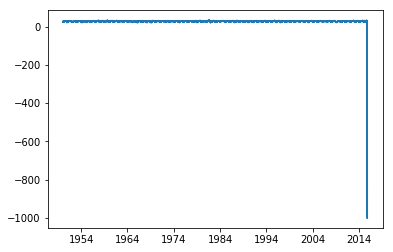

In [37]:
pp.plot(lihuedata_tmax['date'], lihuedata_tmax['value'])

In [38]:
def get_observations(filename, obs):
    data = np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])
    
    data['value'][data['value'] == -999.9] = np.nan
    
    return data

In [39]:
lihuedata_tmax= get_observations('USW00022536.dly', 'TMAX')
lihuedata_tmin= get_observations('USW00022536.dly', 'TMIN')

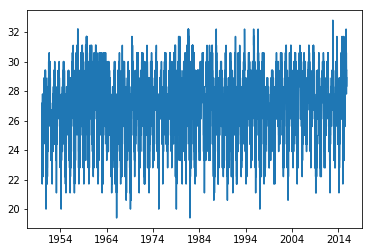

In [40]:
pp.plot(lihuedata_tmax['date'], lihuedata_tmax['value'])


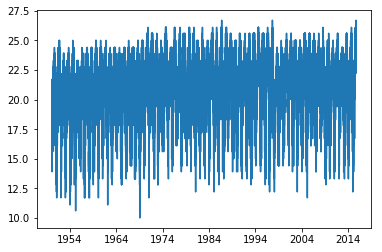

In [41]:
pp.plot(lihuedata_tmin['date'], lihuedata_tmin['value'])

In [42]:
np.mean(lihuedata_tmin['value']), np.mean(lihuedata_tmax['value'])

(nan, nan)

In [49]:
# filling nan's in the data

In [50]:
def fillnan(data):
    dates_float = data['date'].astype(np.float64)
    
    nan = np.isnan(data['value'])
    
    data['value'][nan] = np.interp(dates_float[nan],dates_float[~nan],data['value'][~nan])

In [51]:
fillnan(lihuedata_tmax)
fillnan(lihuedata_tmin)

In [52]:
np.mean(lihuedata_tmin['value']), np.mean(lihuedata_tmax['value'])

(21.051530250594173, 27.300908977192176)

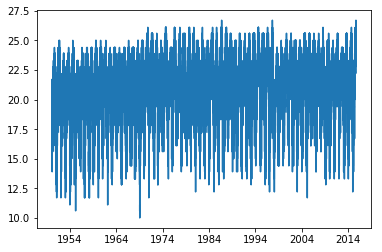

In [53]:
pp.plot(lihuedata_tmin['date'],lihuedata_tmin['value'])

In [54]:
def plot_smoothed(t,win=10):
    smoothed = np.correlate(t['value'],np.ones(win)/win,'same')
    
    pp.plot(t['date'],smoothed)

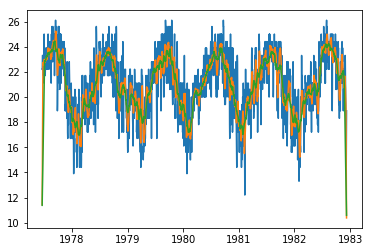

In [55]:
pp.plot(lihuedata_tmin[10000:12000]['date'],lihuedata_tmin[10000:12000]['value'])

plot_smoothed(lihuedata_tmin[10000:12000])
plot_smoothed(lihuedata_tmin[10000:12000],30)

Text(0.5,1,'Temperatures in several years')

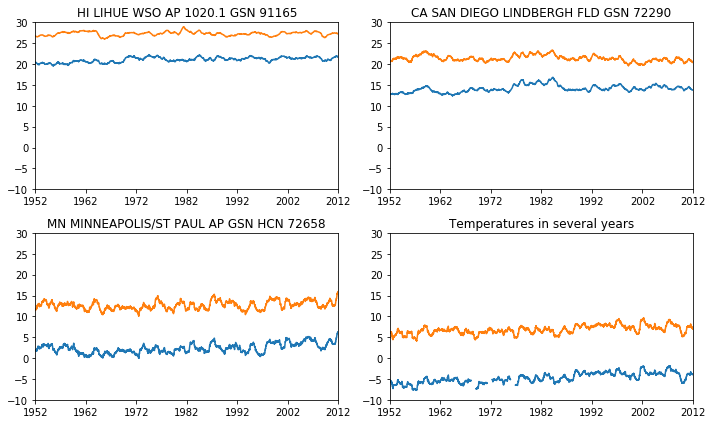

In [59]:
pp.figure(figsize=(10,6))

for i,code in enumerate(datalocations):
    pp.subplot(2,2,i+1)
    
    plot_smoothed(get_observations('{}.dly'.format(code),'TMIN'),365)
    plot_smoothed(get_observations('{}.dly'.format(code),'TMAX'),365)
    
    pp.title(locations[code])
    pp.axis(xmin=np.datetime64('1952'),xmax=np.datetime64('2012'),ymin=-10,ymax=30)

pp.tight_layout()
pp.title('Temperatures in several years')

In [60]:
def selectyear(data,year):
    start_date = np.datetime64('{}'.format(year))
    end_date = start_date + np.timedelta64(1,'Y')
    
    return data[(data['date'] >= start_date) & (data['date'] < end_date)]['value']

In [61]:
selectyear(lihuedata_tmin,2012)

array([ 17.8,  17.2,  17.8,  19.4,  22.8,  20.6,  19.4,  17.8,  19.4,
        21.7,  19.4,  16.7,  15. ,  13.3,  21.7,  23.3,  22.8,  22.2,
        21.1,  20.6,  22.8,  20. ,  18.3,  18.3,  20.6,  20.6,  18.3,
        19.4,  22.2,  21.1,  21.1,  18.9,  18.9,  16.7,  16.7,  17.2,
        17.2,  16.7,  15. ,  14.4,  20.6,  21.7,  22.2,  22.2,  18.9,
        17.8,  20.6,  21.7,  21.1,  20.6,  21.7,  22.2,  22.2,  20. ,
        20. ,  18.3,  18.3,  18.3,  21.7,  20. ,  22.8,  21.1,  19.4,
        18.3,  17.2,  17.8,  18.9,  20.6,  16.7,  21.1,  21.1,  21.1,
        21.1,  19.4,  20.6,  21.7,  20.6,  21.7,  20. ,  20. ,  21.1,
        19.4,  20. ,  20.6,  19.4,  19.4,  20.6,  20.6,  21.1,  20. ,
        22.2,  20. ,  18.9,  21.1,  22.8,  22.8,  22.2,  20.6,  20. ,
        20.6,  20. ,  21.7,  20. ,  18.3,  18.9,  22.2,  21.1,  22.8,
        22.2,  22.2,  22.2,  20.6,  20. ,  21.7,  20.6,  21.1,  21.1,
        19.4,  22.8,  22.8,  22.2,  22.2,  21.7,  21.1,  21.1,  21.7,
        22.8,  21.1,

In [62]:
lihuedata_tmin_all = np.vstack([selectyear(lihuedata_tmin,year)[:365] for year in range(1951,2014+1)])

In [63]:
lihuedata_tmin_all

array([[ 17.8,  17.8,  17.2, ...,  20.6,  19.4,  18.9],
       [ 17.2,  19.4,  21.7, ...,  21.7,  20.6,  17.8],
       [ 17.8,  18.3,  19.4, ...,  13.3,  15. ,  15. ],
       ..., 
       [ 17.8,  17.2,  17.8, ...,  18.3,  18.9,  19.4],
       [ 20. ,  20. ,  19.4, ...,  19.4,  20. ,  18.3],
       [ 17.8,  20. ,  17.8, ...,  18.9,  16.1,  14.4]])

In [64]:
lihuedata_tmin_all.shape

(64, 365)

In [65]:
lihuedata_tmin_recordmin = np.min(lihuedata_tmin_all,axis=0)
lihuedata_tmin_recordmax = np.max(lihuedata_tmin_all,axis=0)

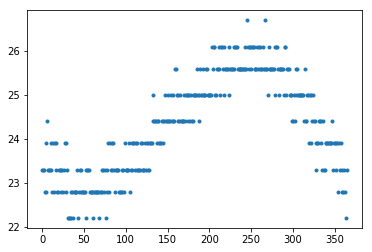

In [66]:
pp.plot(lihuedata_tmin_recordmax,'.')

In [67]:
lihuedata_tmax_all = np.vstack([selectyear(lihuedata_tmax,year)[:365] for year in range(1951,2014+1)])

(-18.25, 365, 8.8599999999999994, 33.939999999999998)

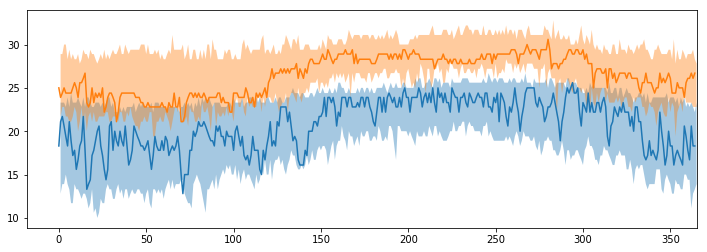

In [68]:
pp.figure(figsize=(12,4))

days = np.arange(1,365+1)

pp.fill_between(days,np.min(lihuedata_tmin_all,axis=0),np.max(lihuedata_tmin_all,axis=0),alpha=0.4)
pp.plot(selectyear(lihuedata_tmin,2009))

pp.fill_between(days,np.min(lihuedata_tmax_all,axis=0),np.max(lihuedata_tmax_all,axis=0),alpha=0.4)
pp.plot(selectyear(lihuedata_tmax,2009))

pp.axis(xmax=365)

In [69]:
minneapolisdata_tmax = get_observations('USW00014922.dly','TMAX')
minneapolisdata_tmin = get_observations('USW00014922.dly','TMIN')

In [70]:
sandiegodata_tmax = get_observations('USW00023188.dly','TMAX')
sandiegodata_tmin = get_observations('USW00023188.dly','TMIN')

In [71]:
fillnan(minneapolisdata_tmax)
fillnan(minneapolisdata_tmin)
fillnan(sandiegodata_tmax)
fillnan(sandiegodata_tmin)

In [72]:
year_range = np.arange(1940,2014+1)

In [73]:
minneapolisdata_tmax_all = np.vstack([selectyear(minneapolisdata_tmax,year)[:365] for year in year_range])

In [74]:
minneapolis_data_mean = np.mean(minneapolisdata_tmax_all,axis=1)

Text(0.5,1,'Minneapolis temperatures in several years')

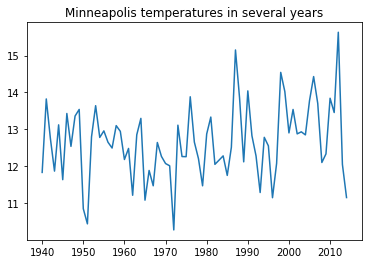

In [76]:
pp.plot(year_range,minneapolis_data_mean)
pp.title("Minneapolis temperatures in several years")

In [77]:
minneapolis_warmest = year_range[np.argmax(minneapolis_data_mean)]
minneapolis_warmest


2012

In [79]:
sandiegodata_tmin_all = np.vstack([selectyear(sandiegodata_tmin,year)[:365] for year in year_range])
sandiego_data_mean = np.mean(sandiegodata_tmin_all,axis=1)
sandiego_coldest = year_range[np.argmin(sandiego_data_mean)]
sandiego_coldest

1948

Text(0.5,1,'2012 in Minneapolis vs. 1948 in San Diego')

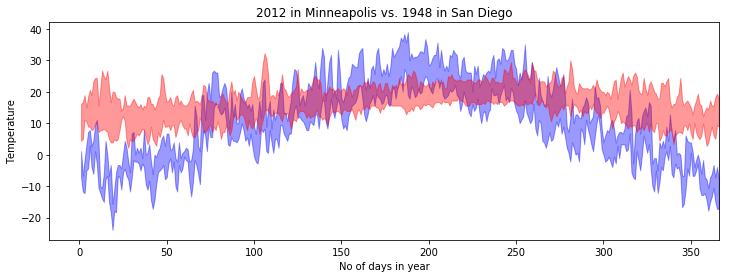

In [94]:
pp.figure(figsize=(12,4))

days = np.arange(1,366+1)

pp.fill_between(days,
                selectyear(minneapolisdata_tmin,minneapolis_warmest),
                selectyear(minneapolisdata_tmax,minneapolis_warmest),
                color='blue',alpha=0.4)

pp.fill_between(days,
                selectyear(sandiegodata_tmin,sandiego_coldest),
                selectyear(sandiegodata_tmax,sandiego_coldest),
                color='red',alpha=0.4)

pp.axis(xmax=366)
pp.xlabel("No of days in year")
pp.ylabel("Temperature")


pp.title('{} in Minneapolis vs. {} in San Diego'.format(minneapolis_warmest,sandiego_coldest))